# Bernstein-Vazirani Algorthm
> Let's say there is a 6-bit information inside a box then how many attempts do we needed to guess that information correctly. for example classical computer's will take 6 attempts for 6 bit-information but if the number of bit increases then number of attempts will also increase for classical computer to guess that number but if we have a quantum computer then using Bernstein-Vazirani algorith we can guess that information in a single attempt. We can see that this algorithm show that quantum computer outperfom the classical computer.

0. Secret Number in a box : 101001 
1. If we feed a guess number then box says yes if it is or no if it's not. How do we determine this secret number ?
2. Classical Computer : 000000, 000001,..., 64th
3. Quantum Computer :
   |BOX |101001|
   |----|-----|
   |AND |000001|
   |AND |000010|
   |AND |000100|
   |AND |001000|
   |AND |010000|
   |AND |100000|
   |Answer|101001|





In [43]:
from qiskit import *

In [44]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [45]:
secret_number = '101001'

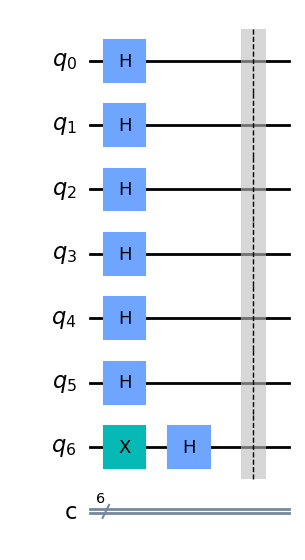

In [46]:
qc = QuantumCircuit(6+1, 6)
qc.h([0, 1, 2, 3, 4, 5])
qc.x(6)
qc.h(6)
qc.barrier()
qc.draw(output='mpl')

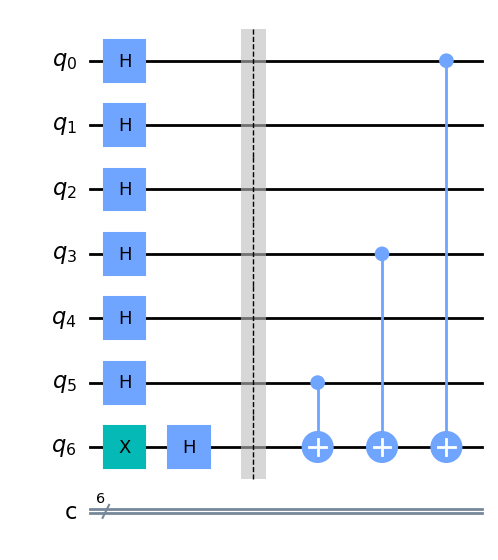

In [47]:
# building box of secret number
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(0, 6)


qc.draw(output='mpl')

In [48]:
qc.barrier()
qc.h([0, 1, 2, 3, 4, 5])


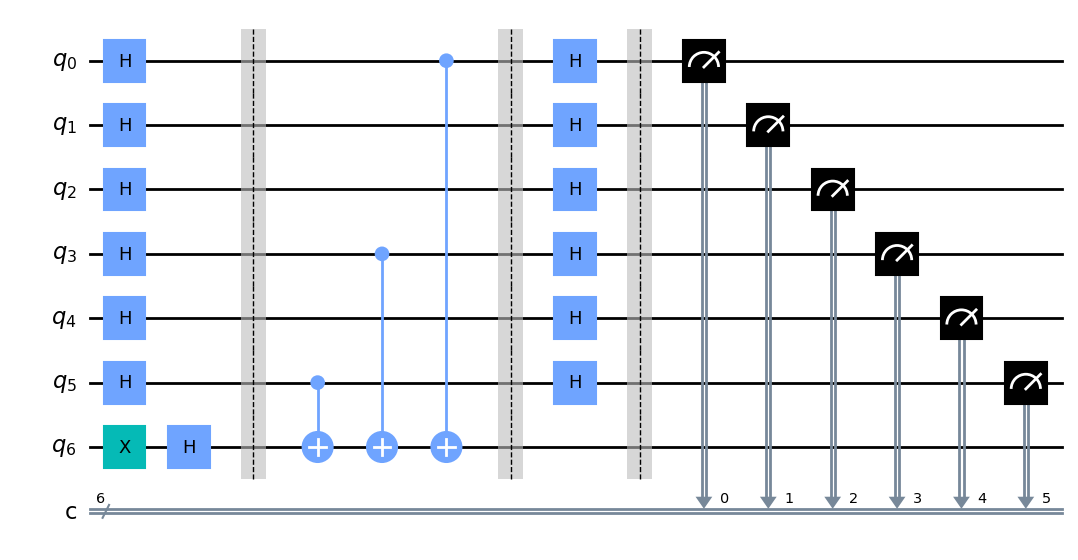

In [49]:
qc.barrier()
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

qc.draw(output='mpl')

In [50]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'101001': 1}


In [51]:
secret_number = '1000100110010101001'

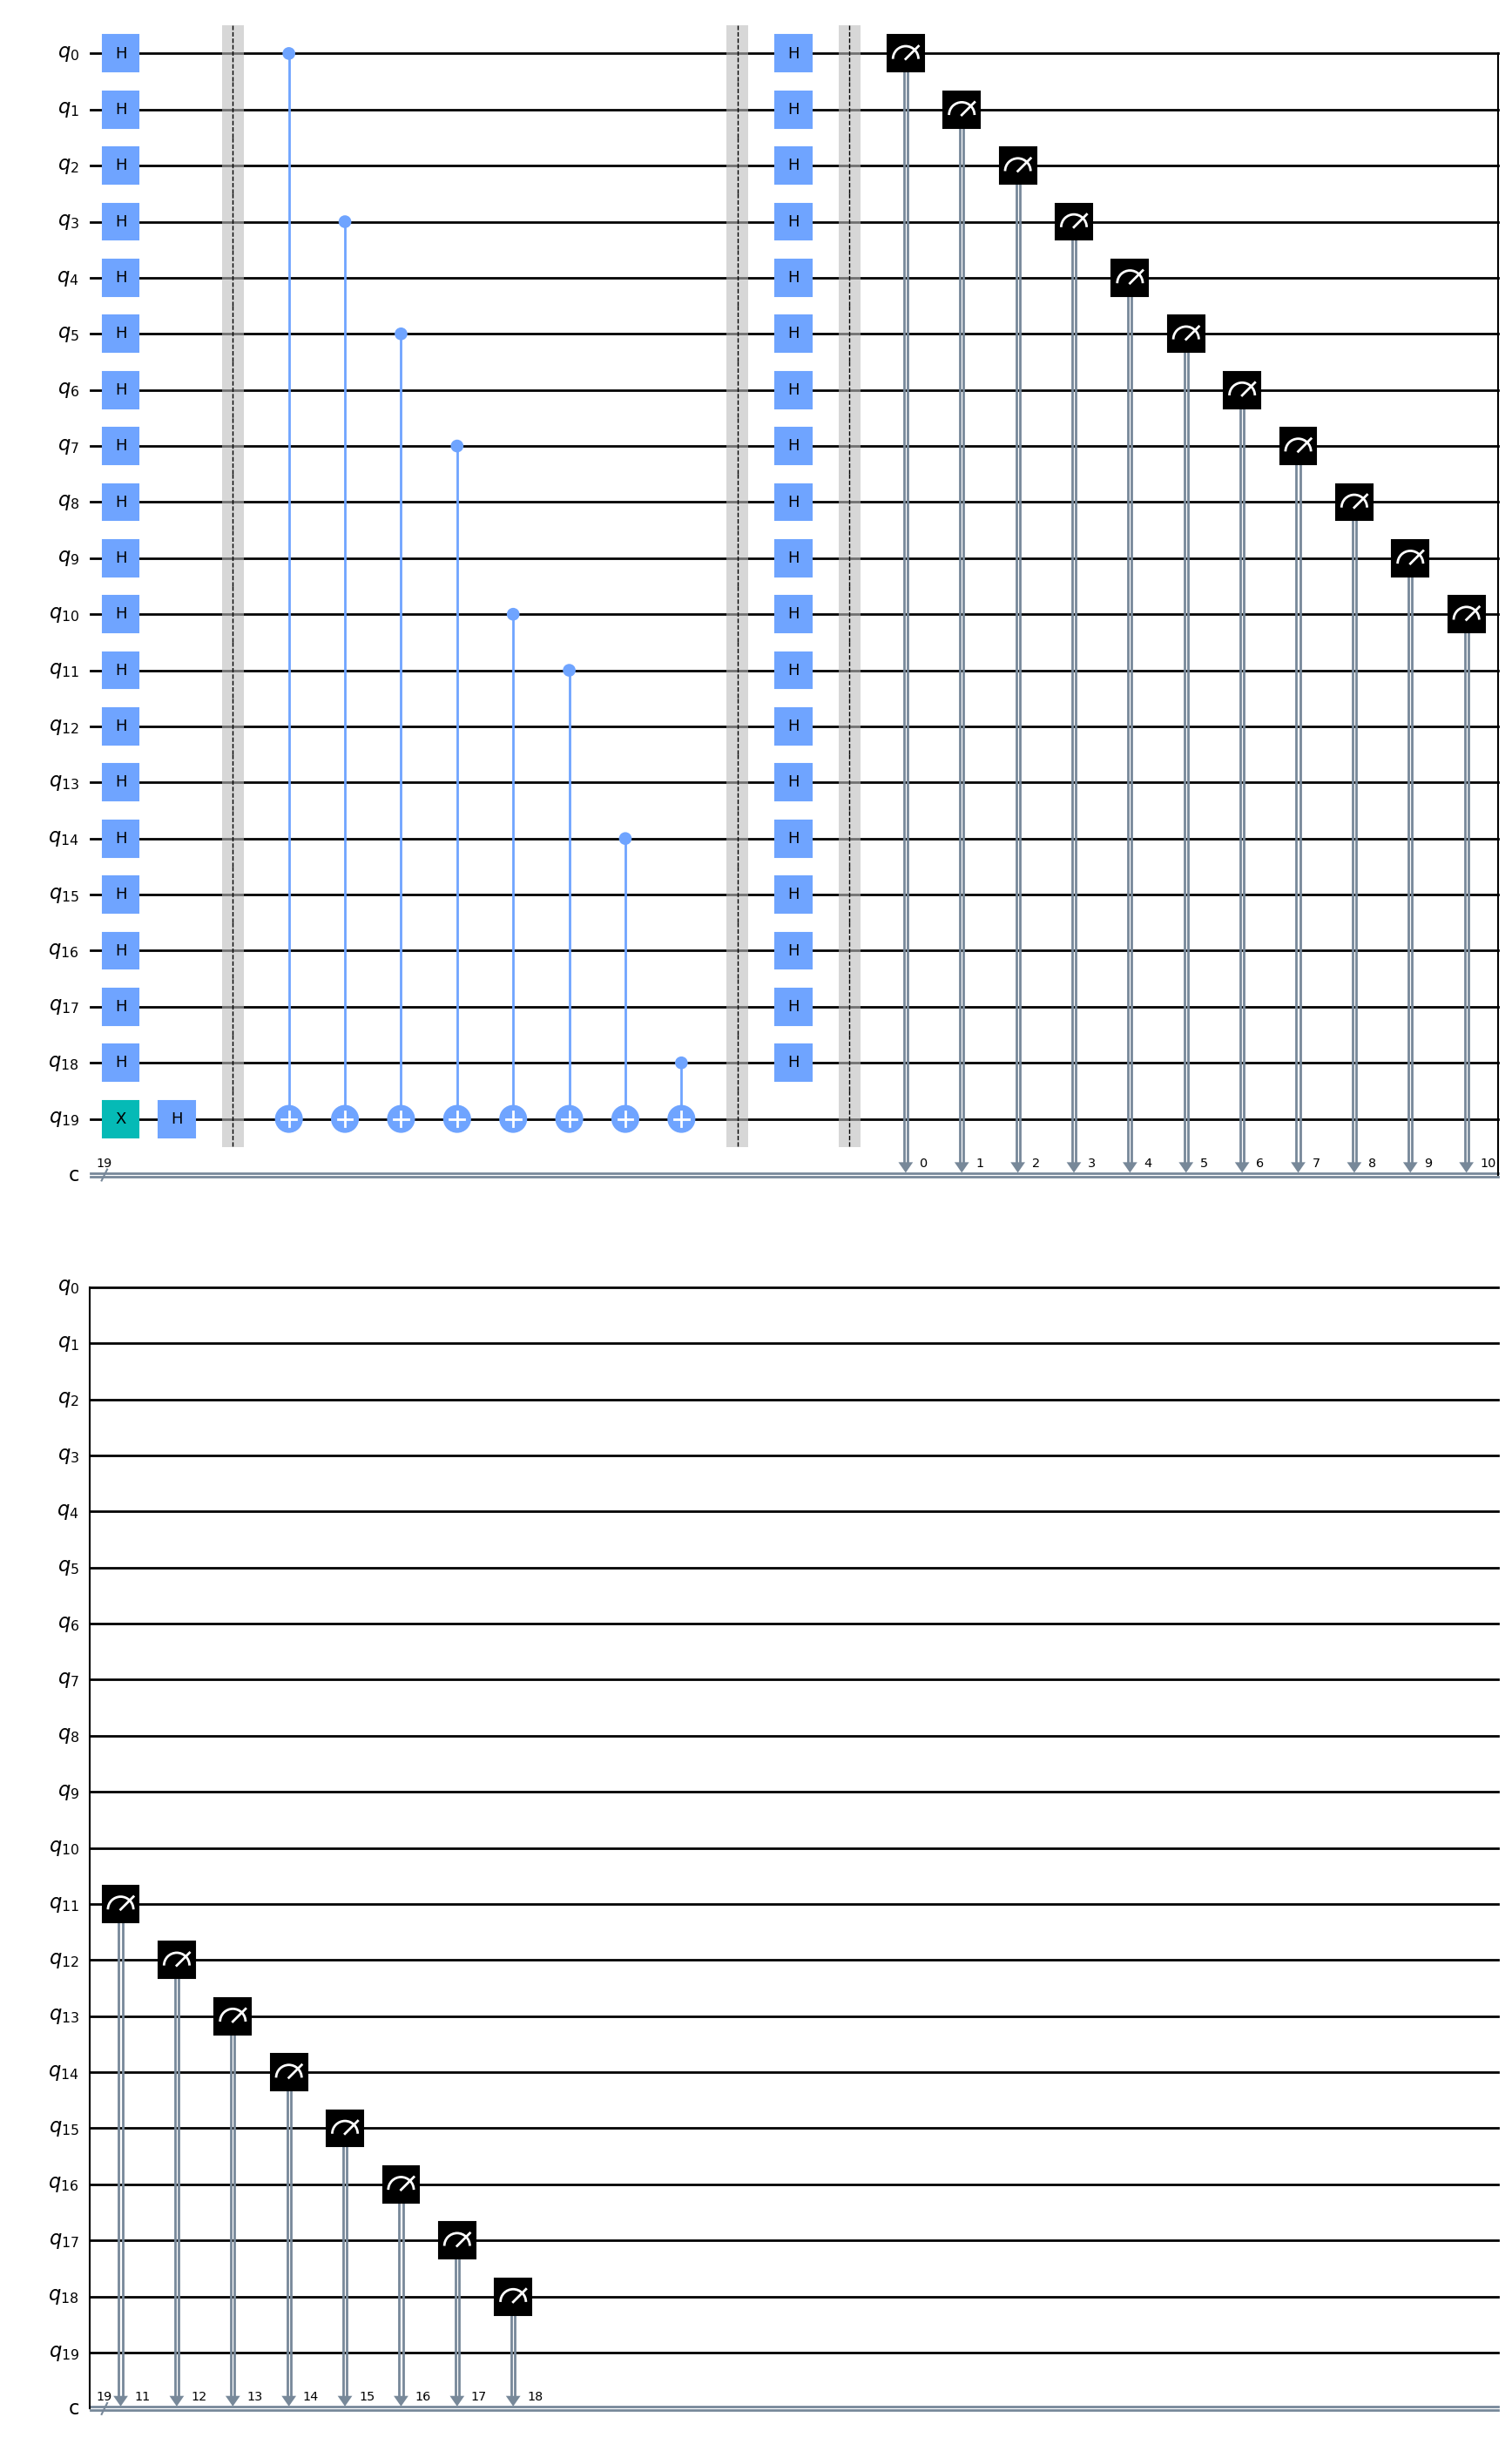

In [52]:
qc = QuantumCircuit(len(secret_number)+1, len(secret_number))
qc.h(range(len(secret_number)))
qc.x(len(secret_number))
qc.h(len(secret_number))
qc.barrier()

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1':
        qc.cx(ii, len(secret_number))
        
        
qc.barrier()
qc.h(range(len(secret_number)))

qc.barrier()
qc.measure(range(len(secret_number)), range(len(secret_number)))

qc.draw(output='mpl')

In [53]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1000100110010101001': 1}
